In [1]:
# import (same as in every file. Will not need all imports in this particular file.
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import gsw

In [3]:
neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []
for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']
polygon_w = Polygon(df_w.values)

In [4]:
newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []
for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})
lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})
polygon_v = Polygon(df_v.values.tolist())

In [5]:
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []
for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})
lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})
polygon_x = Polygon(df_x.values.tolist())

In [6]:
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []
for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})
lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})
polygon_y = Polygon(df_y.values)

In [7]:
newt = [['', '', '42.20', '', '', '70.50'], ['', '', '42.00', '', '', '70.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.80', '', '', '68.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '43.90', '', '', '69.00'], ['', '', '43.70', '', '', '70.00'], ['', '', '43.00', '', '', '70.50'], ['', '', '42.20', '', '', '70.50']]
lon_t = []; lat_t = []
for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})
lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})
polygon_t = Polygon(df_t.values)

In [8]:
years = []; latlat = []; lonlon = []; ydyd = []

for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if yd >=0 and yd <= 365:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True or polygon_y.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True or polygon_x.contains(point) == True:
            latlat.append(month_df['lat'].iloc[ii])
            lonlon.append(month_df['lon'].iloc[ii])
            ydyd.append(month_df['day'].iloc[ii])
            years.append(year)
    print(year)

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [9]:
datalatlon = pd.DataFrame({'lon': lonlon,'lat': latlat})
print(len(datalatlon))

38340


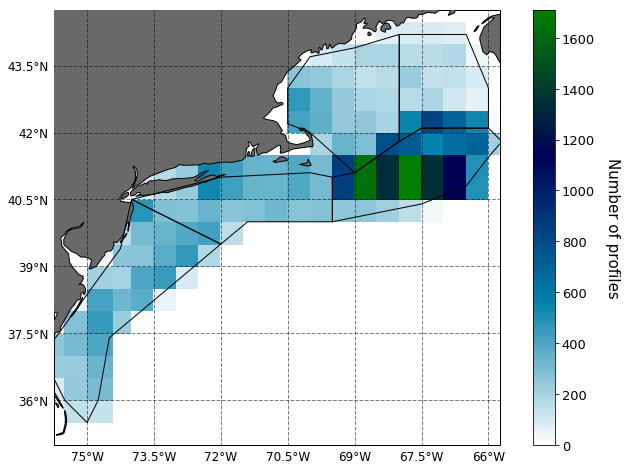

In [11]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

xedges = [-78,-77.5,-77.0,-76.5,-76,-75.5,-75,-74.4,-74,-73.5,-73,-72.5,-72,-71.5,-71,-70.5,-70,-69.5,-69,-68.5,-68,-67.5,-67,-66.5,-66,-65.5]
yedges = [35,35.5,36.0,36.5,37,37.5,38,38.5,39,39.5,40.0,40.5,41.5,42,42.5,43,43.5,44,44.5,45]
plt.hist2d(datalatlon['lon']*-1, datalatlon['lat'], bins = [xedges,yedges], cmap = 'ocean_r')
plt.plot(df_w_plot['lon'], df_w_plot['lat'],color='black', linewidth=1, zorder=50)
plt.plot(df_t_plot['lon'], df_t_plot['lat'],color='black', linewidth=1, zorder=50)
plt.plot(df_y_plot['lon'], df_y_plot['lat'],color='black', linewidth=1, zorder=50)
plt.plot(df_v_plot['lon'], df_v_plot['lat'],color='black', linewidth=1, zorder=50)
plt.plot(df_x_plot['lon'], df_x_plot['lat'],color='black', linewidth=1, zorder=50)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)

ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Number of profiles', rotation=-90, fontsize = 15)
cbar.set_ticks([0,200,400,600,800,1000,1200,1400,1600])
cbar.ax.tick_params(labelsize=13)
plt.show()